In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


session = fastf1.get_session(2021, "Austrian Grand Prix", "Q")
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (403.97 MB) /home/natesawant/.cache/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']
core        WARNING 	Fa

In [8]:
fastf1.get_event_schedule(1950)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,1,UK,Silverstone,,1950-05-13,British Grand Prix,conventional,Practice 1,None,1950-05-11,...,Practice 3,None,1950-05-12,Qualifying,None,1950-05-12,Race,None,1950-05-13,False
1,2,Monaco,Monte-Carlo,,1950-05-21,Monaco Grand Prix,conventional,Practice 1,None,1950-05-19,...,Practice 3,None,1950-05-20,Qualifying,None,1950-05-20,Race,None,1950-05-21,False
2,3,USA,Indianapolis,,1950-05-30,Indianapolis 500,conventional,Practice 1,None,1950-05-28,...,Practice 3,None,1950-05-29,Qualifying,None,1950-05-29,Race,None,1950-05-30,False
3,4,Switzerland,Bern,,1950-06-04,Swiss Grand Prix,conventional,Practice 1,None,1950-06-02,...,Practice 3,None,1950-06-03,Qualifying,None,1950-06-03,Race,None,1950-06-04,False
4,5,Belgium,Spa,,1950-06-18,Belgian Grand Prix,conventional,Practice 1,None,1950-06-16,...,Practice 3,None,1950-06-17,Qualifying,None,1950-06-17,Race,None,1950-06-18,False
5,6,France,Reims,,1950-07-02,French Grand Prix,conventional,Practice 1,None,1950-06-30,...,Practice 3,None,1950-07-01,Qualifying,None,1950-07-01,Race,None,1950-07-02,False
6,7,Italy,Monza,,1950-09-03,Italian Grand Prix,conventional,Practice 1,None,1950-09-01,...,Practice 3,None,1950-09-02,Qualifying,None,1950-09-02,Race,None,1950-09-03,False


In [ ]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

In [2]:
x = np.array(tel["X"].values)
y = np.array(tel["Y"].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel["nGear"].to_numpy().astype(float)

In [3]:
cmap = colormaps["Paired"]
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

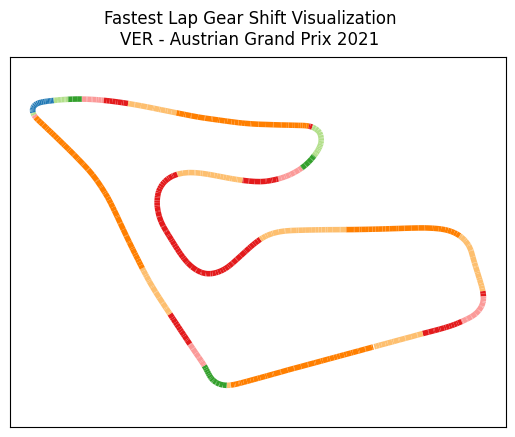

In [4]:
plt.gca().add_collection(lc_comp)
plt.axis("equal")
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

In [5]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()

/tmp/ipykernel_19896/4196942005.py:1: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


<Figure size 640x480 with 0 Axes>